# Rolling Beta

In this activity, you’ll calculate a rolling beta to reevaluate a previous investment decision.


Instructions:
The high-level steps are as follows:

1. Create a DataFrame and calculate the returns.

2. Calculate the beta of each stock.

3. Calculate the 30-day rolling beta of each stock.

The following three subsections provide the detailed steps for each.

Part 1: Create a DataFrame and Calculate the Returns

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to import `nflx.csv` into a Pandas DataFrame. Be sure to set the `DateTimeIndex`. Then review the first five rows of the DataFrame.

3. Use the `pct_change` and `dropna` functions to calculate the daily returns for each stock in the DataFrame.

Part 2: Calculate the Beta of Each Stock

1. Calculate the variance of the S&P 500 returns.

2. Calculate the covariance of the daily returns of each stock relative to those of the S&P 500.

3. Calculate the beta for each stock by using its covariance values and the variance of the S&P 500.


Part 3: Calculate the 30-day Rolling Beta of Each Stock

1. Calculate and plot the 30-day rolling variance of the S&P 500 daily returns.

2. Calculate the 30-day rolling covariance of FB relative to the S&P 500. Then calculate the 30-day rolling beta of FB by using the covariance and the variance of the S&P 500. Finally, plot the 30-day rolling beta of FB.

3. Calculate the 30-day rolling covariance of TWTR relative to the S&P 500. Then calculate the 30-day rolling beta of TWTR by using the covariance and the variance of the S&P 500. Finally, plot the 30-day rolling beta of TWTR.

4. Calculate the 30-day rolling covariance of SNAP relative to the S&P 500. Then calculate the 30-day rolling beta of SNAP by using the covariance and the variance of the S&P 500. Finally, plot the 30-day rolling beta of SNAP.

5. Combine the three plots of the 30-day rolling beta values of each social media stock into the same plot.

References:

[Pandas var function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)

[Pandas cov function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)

[Pandas rolling function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)


## Part 1: Create a DataFrame and Calculate the Returns

### Step 1: Import the required libraries and dependencies.

In [19]:
# Import the Pandas library
import pandas as pd

# Import the NumPy library
import numpy as np

# Import the Path module from the Pathlib library
from pathlib import Path

# Import the %matplotlib inline dependency
%matplotlib inline



### Step 2: Use the `read_csv` function and the `Path` module to import `nflx.csv` into a Pandas DataFrame. Be sure to set the `DateTimeIndex`. Then review the first five rows of the DataFrame.

In [20]:
# Using the read_csv function and the Path module, read in the "tech_data.csv" file from the Resources folder
# Set the "Date" as the index column
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
tech_df = tech_df = pd.read_csv(
    Path("/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 4/Reading Activities/03-Rolling_Beta/Resources/tech_data.csv"), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True
)
tech_df.head()


,FB,TWTR,SNAP,S&P 500
Date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


### Step 3: Use the `pct_change` and `dropna` functions to calculate the daily returns for each stock in the DataFrame.

In [21]:
# Using the Pandas pct_change function in conjunction with the dropna function, generate the tech daily returns DataFrame
tech_daily_returns = tech_df.pct_change().dropna()

# Review the first 5 rows of the tech daily returns DataFrame
tech_daily_returns.head()



,FB,TWTR,SNAP,S&P 500
Date,,,,
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284
2017-03-09,0.003776,-0.001312,-0.004384,0.000800


## Part 2: Calculate the Beta of Each Stock

### Step 1: Calculate the variance of the S&P 500 returns.

In [22]:
# Using the Pandas var function, calculate the variance of the S&P 500 using tech daily returns information
# The S&P 500 will represent the market throughout this activity
market_variance = tech_daily_returns["S&P 500"].var()

# Print the variance of the S&P 500
print(f"S&P500 var: {market_variance: .8f}")


S&P500 var:  0.00007001


###  Step 2: Calculate the covariance of the daily returns of each stock relative to those of the S&P 500.

In [23]:
# Using the Pandas cov function, calculate the covariance between the daily returns of FB and the daily returns of the S&P 500
fb_covariance = tech_daily_returns["FB"].cov(tech_daily_returns['S&P 500'])

# Print the FB covariance
print(f"FB covar: {fb_covariance: .8f}")


FB covar:  0.00008972


In [24]:
# Using the Pandas cov function, calculate the covariance between the daily returns of TWTR and the daily returns of the S&P 500
TWTR_covariance = tech_daily_returns["TWTR"].cov(tech_daily_returns['S&P 500'])

# Print the FB covariance
print(f"TWTR covar: {TWTR_covariance: .8f}")


TWTR covar:  0.00010569


In [25]:
# Using the Pandas cov function, calculate the covariance between the daily returns of SNAP and the daily returns of the S&P 500
snap_covariance = tech_daily_returns["SNAP"].cov(tech_daily_returns['S&P 500'])

# Print the FB covariance
print(f"SNAP covar: {snap_covariance: .8f}")


SNAP covar:  0.00007769


### Step 3: Calculate the beta for each stock by using its covariance values and the variance of the S&P 500.

In [26]:
# Calculate betas of FB, TWTR and SNAP by dividing the covariance of each stock by the variance of the S&P 500
fb_beta = fb_covariance / market_variance
twtr_beta = TWTR_covariance / market_variance
snap_beta = snap_covariance / market_variance

# Display the beta of all 3 social media stocks
print(f"FB: {fb_beta} | TWTR: {twtr_beta} | SNAP: {snap_beta}")


FB: 1.2815248952670955 | TWTR: 1.509751599647906 | SNAP: 1.1097434117740557


## Part 3: Calculate the 30-day Rolling Beta of Each Stock

### Step 1: Calculate and plot the 30-day rolling variance of the S&P 500 daily returns.

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

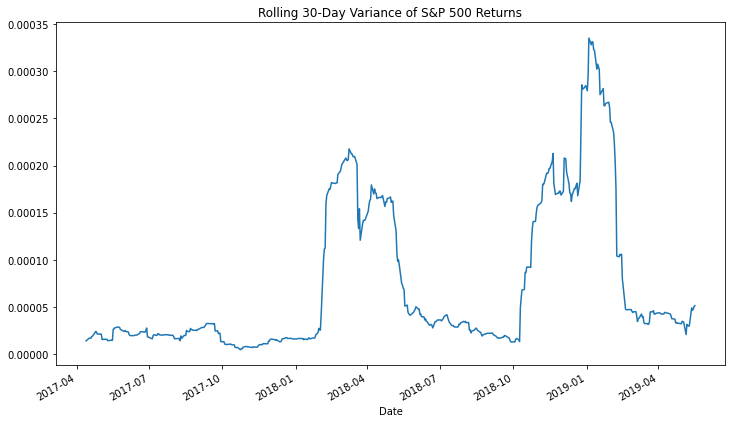

In [28]:
# Using the Pandas rolling function in conjunction with the var function, 
# calculate the 30-day rolling variance for the S&P 500 using tech daily returns information
snp_rolling_30_variance = tech_daily_returns['S&P 500'].rolling(window=30).var()

# Using the Pandas plot function, visualize the 30-day rolling variance of the S&P 500
# Be sure to adjust the figure size and add a title
snp_rolling_30_variance.plot(
    figsize=(12, 7),
    title='Rolling 30-Day Variance of S&P 500 Returns'
)


### Step 2: Calculate the 30-day rolling covariance of FB relative to the S&P 500. Then calculate the 30-day rolling beta of FB by using the covariance and the variance of the S&P 500. Finally, plot the 30-day rolling beta of FB.

<AxesSubplot:title={'center':'FB - 30-Day Rolling Beta'}, xlabel='Date'>

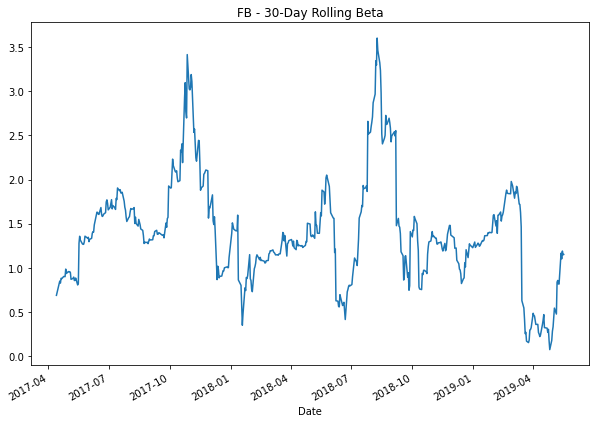

In [32]:
# Using the Pandas rolling function in conjunction with the cov function, 
# calculate the 30-day rolling covariance between the daily returns of FB and the daily returns of the S&P 500
fb_rolling_30_covariance = tech_daily_returns["FB"].rolling(window=30).cov(tech_daily_returns["S&P 500"])

# Calculate FBs 30-day rolling beta by dividing the 30-day rolling covariance of FB by the 30-day rolling variance of the S&P 500
fb_rolling_30_beta = fb_rolling_30_covariance / snp_rolling_30_variance

# Using the Pandas plot function, visualize the 30-day rolling beta of FB
# Be sure to adjust the figure size and add a title
fb_rolling_30_beta.plot(
    figsize=(10, 7),
    title='FB - 30-Day Rolling Beta'
)


### Step 3: Calculate the 30-day rolling covariance of TWTR relative to the S&P 500. Then calculate the 30-day rolling beta of TWTR by using the covariance and the variance of the S&P 500. Finally, plot the 30-day rolling beta of TWTR.

<AxesSubplot:title={'center':'TWTR - 30-Day Rolling Beta'}, xlabel='Date'>

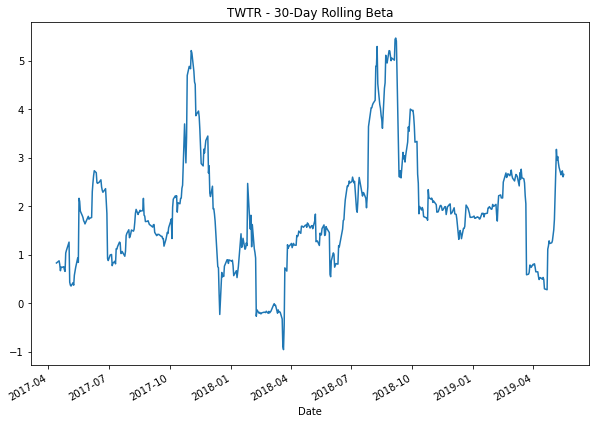

In [33]:
# Using the Pandas rolling function in conjunction with the cov function, 
# calculate the 30-day rolling covariance between the daily returns of TWTR and the daily returns of the S&P 500
twtr_rolling_30_covariance = tech_daily_returns["TWTR"].rolling(window=30).cov(tech_daily_returns["S&P 500"])

# Calculate FBs 30-day rolling beta by dividing the 30-day rolling covariance of FB by the 30-day rolling variance of the S&P 500
twtr_rolling_30_beta = twtr_rolling_30_covariance / snp_rolling_30_variance

# Using the Pandas plot function, visualize the 30-day rolling beta of FB
# Be sure to adjust the figure size and add a title
twtr_rolling_30_beta.plot(
    figsize=(10, 7),
    title='TWTR - 30-Day Rolling Beta'
)


### Step 4: Calculate the 30-day rolling covariance of SNAP relative to the S&P 500. Then calculate the 30-day rolling beta of SNAP by using the covariance and the variance of the S&P 500. Finally, plot the 30-day rolling beta of SNAP.

<AxesSubplot:title={'center':'TWTR - 30-Day Rolling Beta'}, xlabel='Date'>

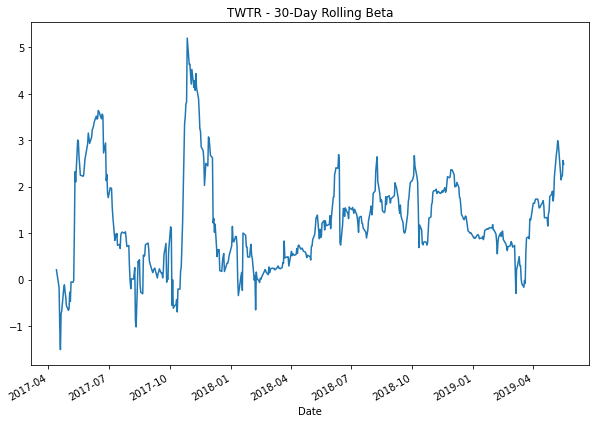

In [34]:
# Using the Pandas rolling function in conjunction with the cov function, 
# calculate the 30-day rolling covariance between the daily returns of TWTR and the daily returns of the S&P 500
snap_rolling_30_covariance = tech_daily_returns["SNAP"].rolling(window=30).cov(tech_daily_returns["S&P 500"])

# Calculate FBs 30-day rolling beta by dividing the 30-day rolling covariance of FB by the 30-day rolling variance of the S&P 500
snap_rolling_30_beta = snap_rolling_30_covariance / snp_rolling_30_variance

# Using the Pandas plot function, visualize the 30-day rolling beta of FB
# Be sure to adjust the figure size and add a title
snap_rolling_30_beta.plot(
    figsize=(10, 7),
    title='TWTR - 30-Day Rolling Beta'
)


### Step 5: Combine the three plots of the 30-day rolling beta values of each social media stock into the same plot.

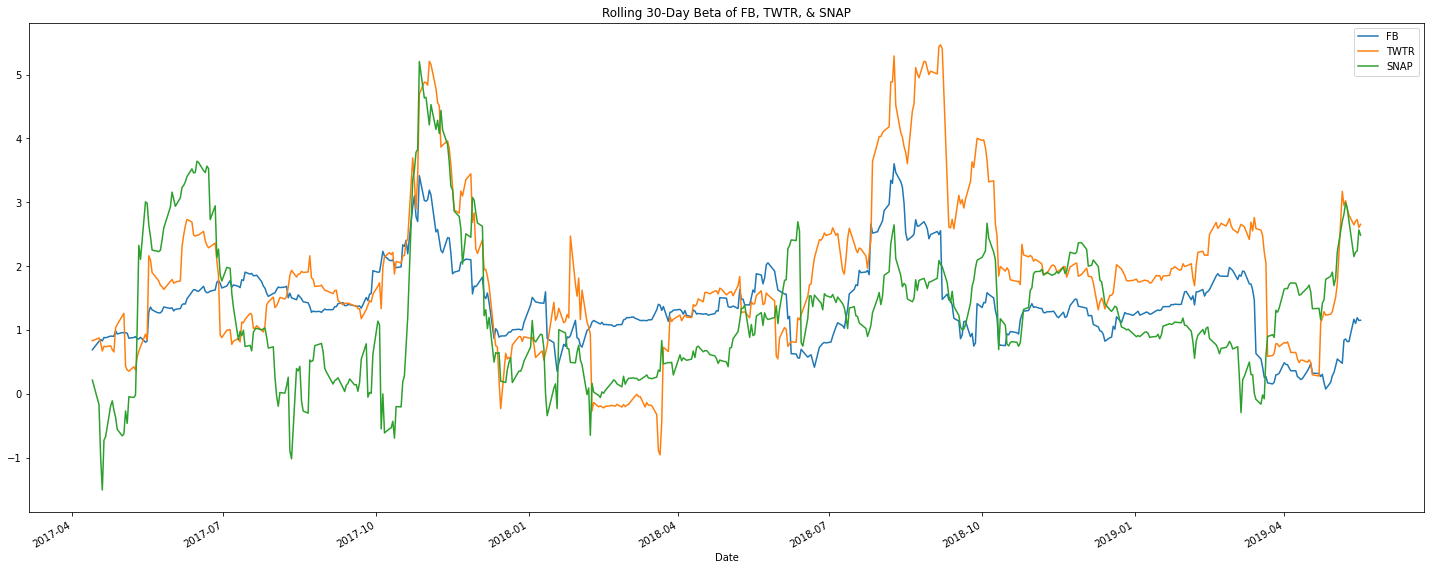

In [35]:
# Using the Pandas plot function, create a plot that visualizes the 30-day rolling beta for FB
# Be sure to adjust the figure size and include a title that accounts for all 3 beta line plots
ax = fb_rolling_30_beta.plot(figsize=(25,10), title="Rolling 30-Day Beta of FB, TWTR, & SNAP")

# Overlay the plots for TWTR and SNAP's 30-day rolling beta
# Hint - be sure to reference the variable ax as a parameter and value inside the plot function
twtr_rolling_30_beta.plot(ax=ax)
snap_rolling_30_beta.plot(ax=ax)

# Set the legend for the visualization
ax.legend(['FB', 'TWTR', 'SNAP'])


### Step 6: Answer the following question: Based on your rolling beta analysis, would you still recommend the same investment if your company insisted on investing in the least risky of the three stocks? 

**Question:** Based on your rolling beta analysis, would you still recommend the same investment if your company insisted on investing in the least risky of the three stocks? 

**Answer:** # YOUR ANSWER HERE